# Propuesta de Noé


In [1]:
# librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Para modelar los datos, vamos a necesitar de la libreria sklearn
from sklearn.linear_model import LinearRegression as LinReg
%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/22581.txt", header = None)

In [3]:
df = df.loc[:,[0,1,2,3]]

In [4]:
df.head()

,0,1,2,3
0,22581,2003-05-01 00:00:00,NaN,NaN
1,22581,2003-05-01 00:15:00,NaN,NaN
2,22581,2003-05-01 00:30:00,NaN,NaN
3,22581,2003-05-01 00:45:00,NaN,NaN
4,22581,2003-05-01 01:00:00,NaN,NaN


In [5]:
# agregar columnas
cols = "numero fecha prec temt".split()
df.columns = cols

In [6]:
# estructura
df.head()

,numero,fecha,prec,temt
0,22581,2003-05-01 00:00:00,NaN,NaN
1,22581,2003-05-01 00:15:00,NaN,NaN
2,22581,2003-05-01 00:30:00,NaN,NaN
3,22581,2003-05-01 00:45:00,NaN,NaN
4,22581,2003-05-01 01:00:00,NaN,NaN


In [7]:
# crear columna con formato fecha
df['fecha_f'] = pd.to_datetime(df['fecha'])

In [8]:
# estructura del df
df.head()

,numero,fecha,prec,temt,fecha_f
0,22581,2003-05-01 00:00:00,NaN,NaN,2003-05-01 00:00:00
1,22581,2003-05-01 00:15:00,NaN,NaN,2003-05-01 00:15:00
2,22581,2003-05-01 00:30:00,NaN,NaN,2003-05-01 00:30:00
3,22581,2003-05-01 00:45:00,NaN,NaN,2003-05-01 00:45:00
4,22581,2003-05-01 01:00:00,NaN,NaN,2003-05-01 01:00:00


In [9]:
# filtrar info 2018
df2018 =  df.loc[df["fecha_f"].dt.year == 2018, ['fecha_f', 'temt']]

In [10]:
# generar columna de fecha
df2018.head(20)

,fecha_f,temt
128110,2018-04-01 00:00:00,15.9
128111,2018-04-01 00:15:00,16.2
128112,2018-04-01 00:30:00,17.2
128113,2018-04-01 00:45:00,16.1
128114,2018-04-01 01:00:00,15.8
128115,2018-04-01 01:15:00,16.0
128116,2018-04-01 01:30:00,15.4
128117,2018-04-01 01:45:00,14.5
128118,2018-04-01 03:00:00,12.5
128119,2018-04-01 03:15:00,11.6


In [11]:
# index to datetime
df2018.index = df2018['fecha_f']

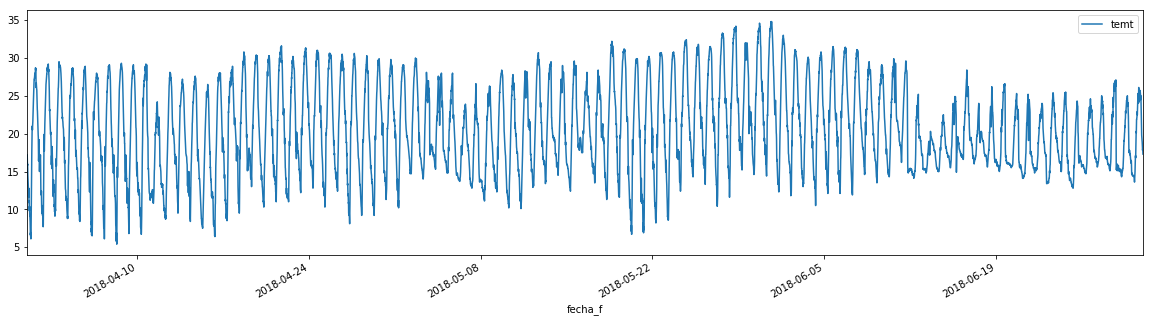

In [12]:
# plot info
df2018.plot(figsize=(20,5))

In [13]:
# crear df año < 2017
dfRest =  df.loc[df["fecha_f"].dt.year < 2018, ['fecha_f', 'temt']]

In [14]:
dfRest.head()

,fecha_f,temt
0,2003-05-01 00:00:00,NaN
1,2003-05-01 00:15:00,NaN
2,2003-05-01 00:30:00,NaN
3,2003-05-01 00:45:00,NaN
4,2003-05-01 01:00:00,NaN


In [15]:
df2018.head()

,fecha_f,temt
fecha_f,,
2018-04-01 00:00:00,2018-04-01 00:00:00,15.9
2018-04-01 00:15:00,2018-04-01 00:15:00,16.2
2018-04-01 00:30:00,2018-04-01 00:30:00,17.2
2018-04-01 00:45:00,2018-04-01 00:45:00,16.1
2018-04-01 01:00:00,2018-04-01 01:00:00,15.8


In [16]:
# crear columnas año, mes, día, hora y minuto
dfRest["Año"] = dfRest['fecha_f'].dt.year
dfRest["Mes"] = dfRest['fecha_f'].dt.month
dfRest["Día"] = dfRest['fecha_f'].dt.day
dfRest["Hora"] = dfRest['fecha_f'].dt.hour
dfRest["Minuto"] = dfRest['fecha_f'].dt.minute

In [17]:
# estructura del df
dfRest.head()

,fecha_f,temt,Año,Mes,Día,Hora,Minuto
0,2003-05-01 00:00:00,NaN,2003,5,1,0,0
1,2003-05-01 00:15:00,NaN,2003,5,1,0,15
2,2003-05-01 00:30:00,NaN,2003,5,1,0,30
3,2003-05-01 00:45:00,NaN,2003,5,1,0,45
4,2003-05-01 01:00:00,NaN,2003,5,1,1,0


In [18]:
# crear copia del df 2018 para generar huecos de información
df2018_test = pd.DataFrame.copy(df2018)

In [19]:
# numero de columnas y renglones
df2018_test.shape

(8732, 2)

In [20]:
# crear columna para valores nulos
df2018_test['temt_t'] = df2018_test['temt']

In [21]:
df2018_test.head()

,fecha_f,temt,temt_t
fecha_f,,,
2018-04-01 00:00:00,2018-04-01 00:00:00,15.9,15.9
2018-04-01 00:15:00,2018-04-01 00:15:00,16.2,16.2
2018-04-01 00:30:00,2018-04-01 00:30:00,17.2,17.2
2018-04-01 00:45:00,2018-04-01 00:45:00,16.1,16.1
2018-04-01 01:00:00,2018-04-01 01:00:00,15.8,15.8


In [22]:
# generar números aleatorios
# Variables
CANTIDAD_NUMEROS_RANDOM = 4000
LIMITE_SUPERIOR_NUMEROS_RANDOM = len(df2018_test["temt_t"]) - CANTIDAD_NUMEROS_RANDOM * .2

numeros_random = np.random.randint(0,LIMITE_SUPERIOR_NUMEROS_RANDOM,CANTIDAD_NUMEROS_RANDOM)
numeros_random

array([7672, 5613, 6596, ..., 4034,  260,  612])

In [23]:
# generar espacios de información
for numero in numeros_random:
    df2018_test.iloc[numero, 2:] = np.nan

In [24]:
# estructura df2018_test
df2018_test.head()

,fecha_f,temt,temt_t
fecha_f,,,
2018-04-01 00:00:00,2018-04-01 00:00:00,15.9,NaN
2018-04-01 00:15:00,2018-04-01 00:15:00,16.2,NaN
2018-04-01 00:30:00,2018-04-01 00:30:00,17.2,NaN
2018-04-01 00:45:00,2018-04-01 00:45:00,16.1,16.1
2018-04-01 01:00:00,2018-04-01 01:00:00,15.8,NaN


In [25]:
# crear columnas
df2018_test["Año"] = df2018_test['fecha_f'].dt.year
df2018_test["Mes"] = df2018_test['fecha_f'].dt.month
df2018_test["Día"] = df2018_test['fecha_f'].dt.day
df2018_test["Hora"] = df2018_test['fecha_f'].dt.hour
df2018_test["Minuto"] = df2018_test['fecha_f'].dt.minute

In [26]:
# estructura df2018_test
df2018_test.head()

,fecha_f,temt,temt_t,Año,Mes,Día,Hora,Minuto
fecha_f,,,,,,,,
2018-04-01 00:00:00,2018-04-01 00:00:00,15.9,NaN,2018,4,1,0,0
2018-04-01 00:15:00,2018-04-01 00:15:00,16.2,NaN,2018,4,1,0,15
2018-04-01 00:30:00,2018-04-01 00:30:00,17.2,NaN,2018,4,1,0,30
2018-04-01 00:45:00,2018-04-01 00:45:00,16.1,16.1,2018,4,1,0,45
2018-04-01 01:00:00,2018-04-01 01:00:00,15.8,NaN,2018,4,1,1,0


In [27]:
# crear el df resutlado
cols = ['fecha', 'temt','temt_medias', "temt_poli", "Año", "Mes", "Día", "Hora", "Minuto"]
resultado = pd.DataFrame(columns=cols)

In [28]:
# iterar en el data frame
for index, row in df2018_test.iterrows():
    if math.isnan(row['temt_t']):
        #print("NULL")
        # medias
        df_temp = dfRest.where((dfRest['Mes'] == row['Mes']) & (dfRest['Día'] == row['Día']) & (dfRest['Hora'] == row['Hora']) & (dfRest['Minuto'] == row['Minuto'])).dropna()
        temt = df_temp['temt'].mean()
        #print(temt)
        # polinomial
        # -2.05405600e-04,   2.72556839e-02,  -7.89609250e-01, 2.04361177e+01
        df_poli = dfRest.where((dfRest['Mes'] == row['Mes']) & (dfRest['Día'] == row['Día'])).dropna()
        grouped = df_poli.groupby(['Hora', "Minuto"]).mean()
        
        grouped = grouped.reset_index()
        
        # coeficientes promedio de meses 4, 5 y 6
        x = np.array(grouped.index)
        y = np.array(grouped['temt'])
        z = np.polyfit(x,y,3)
        
        value = grouped.where((grouped['Hora'] == row['Hora']) & (grouped['Minuto'] == row['Minuto'])).dropna()
        
        #print("***** ROW",row['Minuto'])
        #print("***** VALUE",value.index[0])
        
        value = value.index[0]
        
        poli = z[0] * value**3 + z[1] * value ** 2 + z[2] * value + z[3]
        
        #print(poli)
        
        #print(poli)
        d = {"fecha": row['fecha_f'],
             "temt" : row['temt'],
             "temt_medias": temt,
             "temt_poli" : poli,
             "Año": row['Año'],
             "Mes": row['Mes'],
             "Día": row['Día'],
             "Hora": row['Hora'],
             "Minuto": row['Minuto']}
        resultado = resultado.append(d, ignore_index=True)
    else:
        d = {"fecha": row['fecha_f'],
             "temt" : row['temt'],
             "temt_medias": row['temt'],
             "temt_poli" : row['temt'],
             "Año": row['Año'],
             "Mes": row['Mes'],
             "Día": row['Día'],
             "Hora": row['Hora'],
             "Minuto": row['Minuto']}
        resultado = resultado.append(d, ignore_index=True)
resultado.head()

,fecha,temt,temt_medias,temt_poli,Año,Mes,Día,Hora,Minuto
0,2018-04-01 00:00:00,15.9,16.042857,16.488255,2018,4,1,0,0
1,2018-04-01 00:15:00,16.2,15.428571,15.668897,2018,4,1,0,15
2,2018-04-01 00:30:00,17.2,14.985714,14.910366,2018,4,1,0,30
3,2018-04-01 00:45:00,16.1,16.100000,16.100000,2018,4,1,0,45
4,2018-04-01 01:00:00,15.8,13.964286,13.570010,2018,4,1,1,0


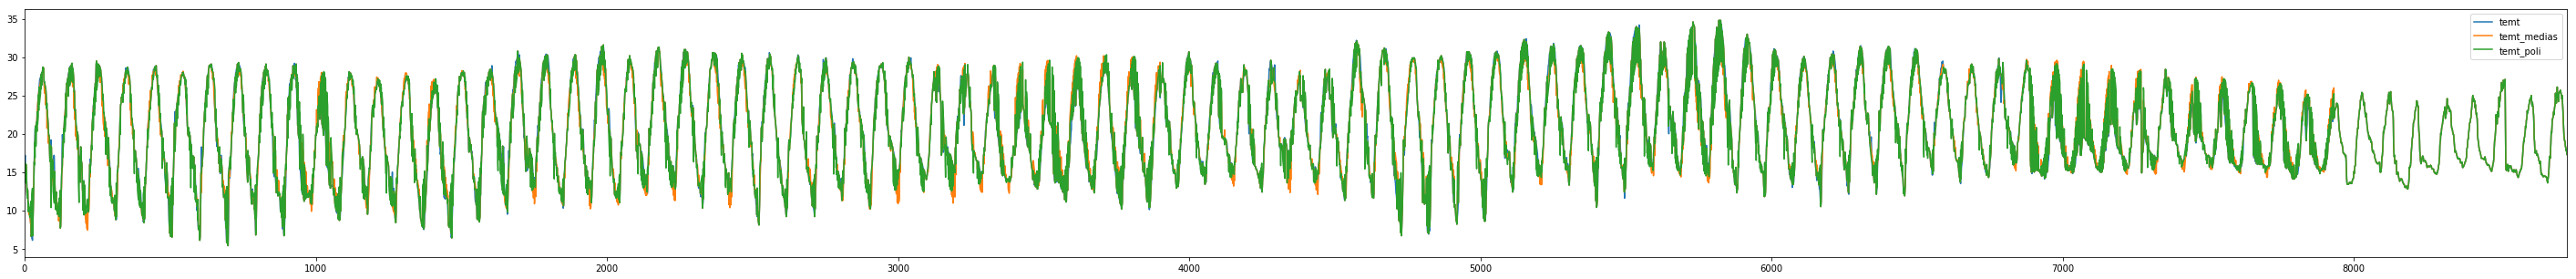

In [29]:
resultado[['temt','temt_medias','temt_poli']].plot(figsize=(50,5))

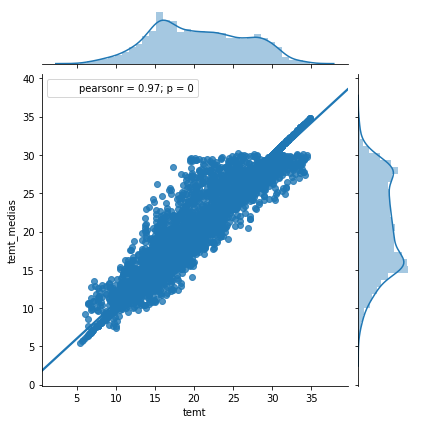

In [30]:
# temt vs temt_medias
sns.jointplot("temt", 'temt_medias', data=resultado, kind='reg')

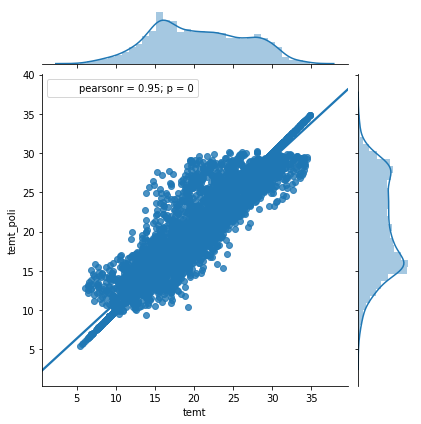

In [31]:
# temt vs temt_medias
sns.jointplot("temt", 'temt_poli', data=resultado, kind='reg')

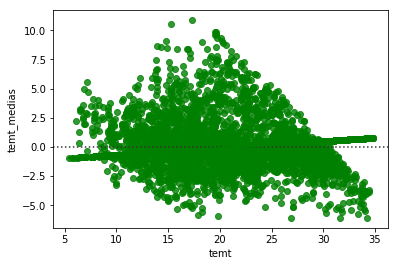

In [32]:
# medias
x = resultado['temt']
y = resultado['temt_medias']
sns.residplot(x, y, lowess=True, color="g")

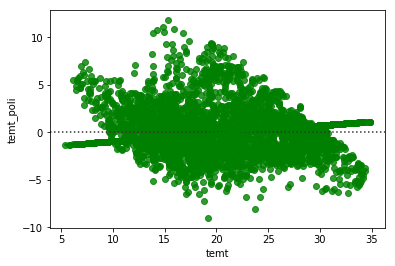

In [33]:
# poli
x = resultado['temt']
y = resultado['temt_poli']
sns.residplot(x, y, lowess=True, color="g")

In [34]:
# desviación estandar
resultado[['temt','temt_medias','temt_poli']].std()

temt           5.914954
temt_medias    5.762080
temt_poli      5.683841
dtype: float64

In [36]:
# varianza
resultado[['temt','temt_medias','temt_poli']].var()

temt           34.986686
temt_medias    33.201567
temt_poli      32.306050
dtype: float64

In [37]:
# OLS Medias
# librería
from statsmodels.formula.api import ols

In [39]:
mod = ols(formula="temt ~ temt_medias", data=resultado)

In [40]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   temt   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.219e+05
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:24:48   Log-Likelihood:                -16098.
No. Observations:                8732   AIC:                         3.220e+04
Df Residuals:                    8730   BIC:                         3.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1007      0.061      1.658      

In [41]:
# OLS Poli
mod = ols(formula="temt ~ temt_poli", data=resultado)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   temt   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.793e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:25:21   Log-Likelihood:                -17413.
No. Observations:                8732   AIC:                         3.483e+04
Df Residuals:                    8730   BIC:                         3.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0858      0.071      1.200      0.2

In [42]:
# diferencias temt - medias
resultado['diff_medias'] = resultado['temt'] - resultado['temt_medias']

In [43]:
# diferencias temt - poli
resultado['diff_poli'] = resultado['temt'] - resultado['temt_poli']

In [44]:
# desviación estandar diff
resultado[['diff_medias','diff_poli']].std()

diff_medias    1.529828
diff_poli      1.778063
dtype: float64

In [45]:
# varianza diff
resultado[['diff_medias','diff_poli']].var()

diff_medias    2.340372
diff_poli      3.161508
dtype: float64

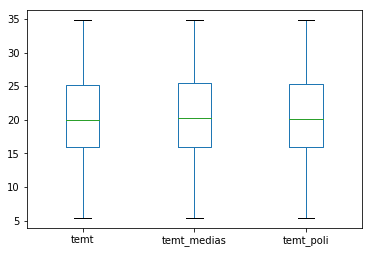

In [50]:
resultado[['temt','temt_medias','temt_poli']].plot(kind='box')

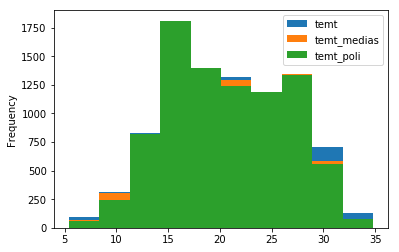

In [51]:
resultado[['temt','temt_medias','temt_poli']].plot(kind='hist')